# Histograms

Demonstrates how to plot histograms with matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Fixing random state for reproducibility
np.random.seed(19680801)

%matplotlib inline

## Generate data and plot a simple histogram

To generate a 1D histogram we only need a single vector of numbers. For a 2D histogram we'll need a second vector. We'll generate both below, and show the histogram for each vector.

(array([3.0000e+00, 1.4000e+01, 6.9000e+01, 2.7700e+02, 9.6900e+02,
        2.5790e+03, 5.8010e+03, 1.0379e+04, 1.5122e+04, 1.7920e+04,
        1.7298e+04, 1.3536e+04, 8.6630e+03, 4.6080e+03, 1.8750e+03,
        6.4100e+02, 2.0000e+02, 3.7000e+01, 7.0000e+00, 2.0000e+00]),
 array([ 0.15026293,  0.64387908,  1.13749522,  1.63111136,  2.12472751,
         2.61834365,  3.11195979,  3.60557594,  4.09919208,  4.59280822,
         5.08642437,  5.58004051,  6.07365665,  6.5672728 ,  7.06088894,
         7.55450508,  8.04812123,  8.54173737,  9.03535351,  9.52896966,
        10.0225858 ]),
 <a list of 20 Patch objects>)

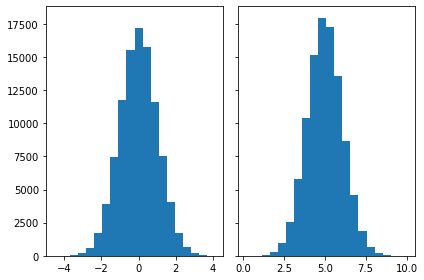

In [2]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

## Updating histogram colors

The histogram method returns (among other things) a patches object. This gives us access to the properties of the objects drawn. Using this, we can edit the histogram to our liking. Let's change the color of each bar based on its y value.

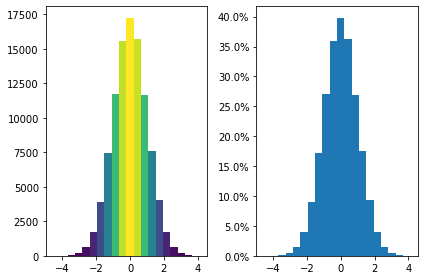

In [3]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

## Plot a 2D histogram

To plot a 2D histogram, one only needs two vectors of the same length, corresponding to each axis of the histogram.

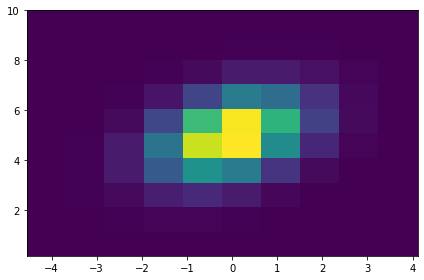

In [4]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

## Customizing your histogram
Customizing a 2D histogram is similar to the 1D case, you can control visual components such as the bin size or color normalization.

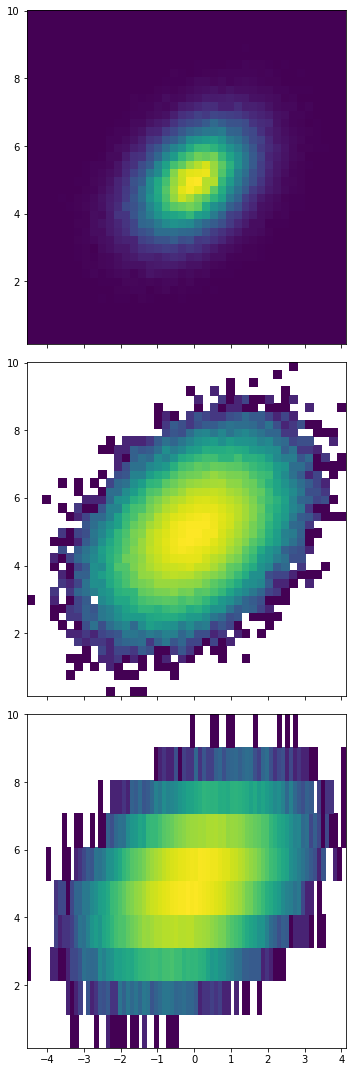

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(5, 15), sharex=True, sharey=True,
                        tight_layout=True)

# We can increase the number of bins on each axis
axs[0].hist2d(x, y, bins=40)

# As well as define normalization of the colors
axs[1].hist2d(x, y, bins=40, norm=colors.LogNorm())

# We can also define custom numbers of bins for each axis
axs[2].hist2d(x, y, bins=(80, 10), norm=colors.LogNorm())

plt.show()